# Stock Perdiction for Amazon using LSTM

## Data Source: Yahoo Finance
Amazon.com,Inc.(AMZN) last 10 years data

### Importing Required Libraries

In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd #To Modify dataset
import numpy as np #for scientific calculations
import matplotlib.pyplot as plt #for vizualisations
from sklearn.preprocessing import MinMaxScaler #Scaling Data
from keras.models import Sequential,load_model #Keras as an interface for TensorFlow and Theano
from keras.layers import LSTM, Dense, Dropout

### Importing the Dataset

In [6]:
amazon_stock = pd.read_csv("./AMZN.csv")

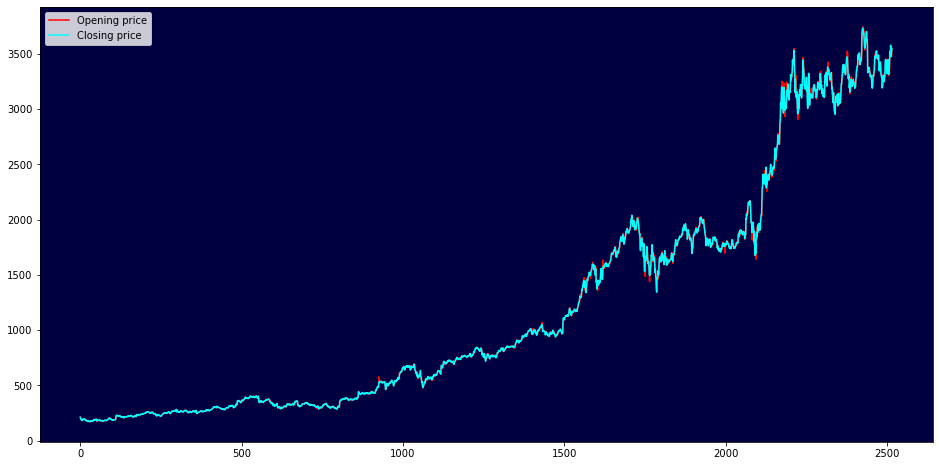

In [7]:
fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(amazon_stock['Open'], color='red', label='Opening price')
ax.plot(amazon_stock['Close'], color='cyan', label='Closing price')
plt.legend()

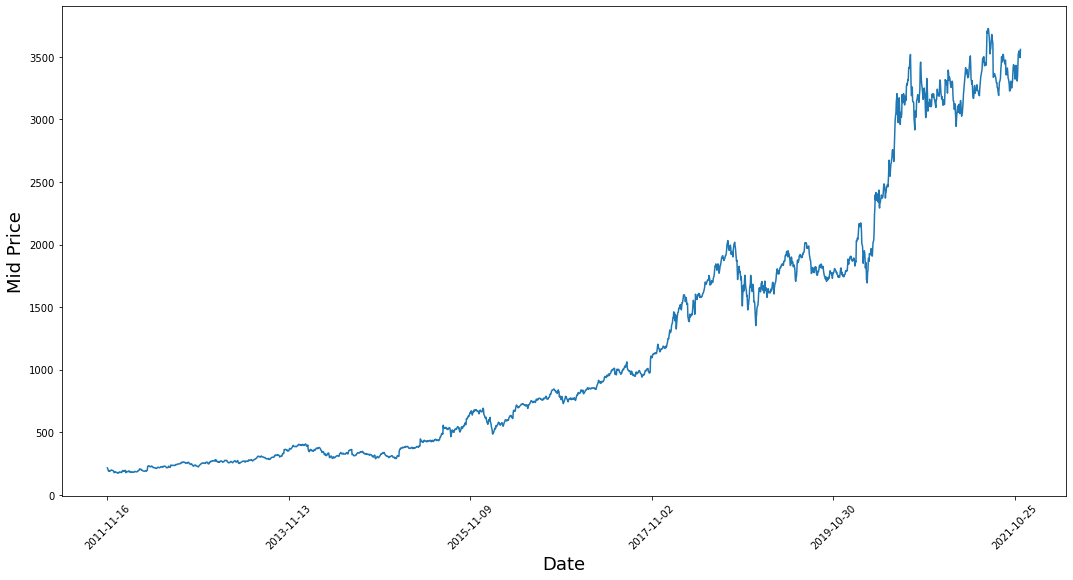

In [9]:
plt.figure(figsize = (18,9))
plt.plot(range(amazon_stock.shape[0]),(amazon_stock['Low']+amazon_stock['High'])/2.0)
plt.xticks(range(0,amazon_stock.shape[0],500),amazon_stock['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [41]:
lowest_price = min(amazon_stock['Low'])
x_lowest = amazon_stock['Low'].idxmin()
lowest_date = amazon_stock['Date'].iloc[x_lowest]
highest_price = max(amazon_stock['High'])
x_highest = amazon_stock['High'].idxmax()
highest_date = amazon_stock['Date'].iloc[x_highest]

2011-12-29


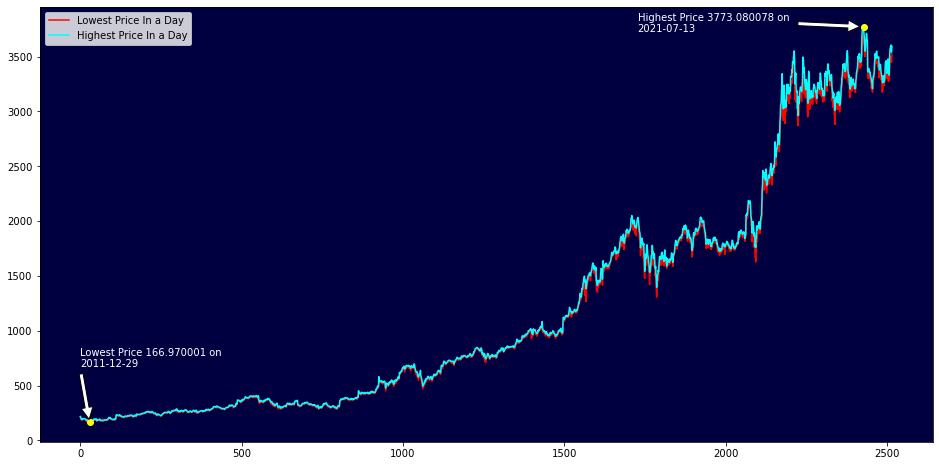

In [51]:
fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(amazon_stock['Low'], color='red', label='Lowest Price In a Day')
ax.plot(amazon_stock['High'], color='cyan', label='Highest Price In a Day')
ax.annotate('Lowest Price '+str(lowest_price)+' on \n'+str(lowest_date),xy=(x_lowest,lowest_price),color = 'white',xytext=(0,lowest_price+500),arrowprops=dict(facecolor='white', shrink=0.05))
ax.plot(x_lowest,lowest_price,'o',color ='yellow')
ax.annotate('Highest Price '+str(highest_price)+' on \n'+str(highest_date),xy=(x_highest,highest_price),color = 'white',arrowprops=dict(facecolor='white', shrink=0.05),xytext=(x_highest-700,highest_price-50))
ax.plot(x_highest,highest_price,'o',color ='yellow')
plt.legend()

In [52]:
amazon_stock['High']

0        216.970001
1        212.899994
2        205.339996
3        193.360001
4        194.039993
           ...     
2511    3593.770020
2512    3605.449951
2513    3543.239990
2514    3540.729980
2515    3593.879883
Name: High, Length: 2516, dtype: float64

# Predicting only using the Stock Market Open Values

### Extracting only required fields from Data

In [53]:
amazon_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-11-16,216.270004,216.970001,211.229996,211.990005,211.990005,5509400
1,2011-11-17,212.509995,212.899994,202.100006,204.520004,204.520004,7983100
2,2011-11-18,205.330002,205.339996,197.110001,197.139999,197.139999,8437500
3,2011-11-21,193.289993,193.360001,185.050003,189.250000,189.250000,11321200
4,2011-11-22,186.949997,194.039993,183.580002,192.339996,192.339996,9915600


In [54]:
amazon_stock.shape

(2516, 7)

In [55]:
amazon_open_stock = amazon_stock['Open'].values
amazon_open_stock = amazon_open_stock.reshape(-1,1)

In [56]:
amazon_open_stock

array([[ 216.270004],
       [ 212.509995],
       [ 205.330002],
       ...,
       [3513.      ],
       [3485.      ],
       [3537.      ]])

### Splitting the data to Training and Testing Set

In [57]:
amazon_open_stock_train = np.array(amazon_open_stock[:int(amazon_open_stock.shape[0]*0.8)])
amazon_open_stock_test = np.array(amazon_open_stock[:int(amazon_open_stock.shape[0]*0.8)])

### Using MinMax scaler to scale data between 0 and 1

In [58]:
scaler = MinMaxScaler(feature_range=(0,1))
amazon_open_stock_train =scaler.fit_transform(amazon_open_stock_train)
amazon_open_stock_test =scaler.fit_transform(amazon_open_stock_test)

### Function to create dataset from train and test dataset

In [59]:
def dataset(df):
    x = []
    y = []
    for i in range(50,df.shape[0]):
        x.append(df[i-50:i,0])
        y.append(df[i,0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [60]:
x_train, y_train = dataset(amazon_open_stock_train)
x_test, y_test = dataset(amazon_open_stock_test)

### Reshaping data to 3D for using in LSTM layer

In [61]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

## Building Prediction Model

In [62]:
model = Sequential()
model.add(LSTM(units = 96, return_sequences= True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 96,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 96))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

In [63]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [64]:
model.compile(loss='mean_squared_error', optimizer='adam')


In [65]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/50
62/62 [==============================] - 9s 67ms/step - loss: 0.0138
Epoch 2/50
62/62 [==============================] - 4s 68ms/step - loss: 0.0021
Epoch 3/50
62/62 [==============================] - 4s 68ms/step - loss: 0.0019
Epoch 4/50
62/62 [==============================] - 4s 67ms/step - loss: 0.0023
Epoch 5/50
62/62 [==============================] - 4s 71ms/step - loss: 0.0021
Epoch 6/50
62/62 [==============================] - 4s 67ms/step - loss: 0.0017
Epoch 7/50
62/62 [==============================] - 4s 70ms/step - loss: 0.0023
Epoch 8/50
62/62 [==============================] - 4s 68ms/step - loss: 0.0021
Epoch 9/50
62/62 [==============================] - 4s 67ms/step - loss: 0.0018
Epoch 10/50
62/62 [==============================] - 4s 70ms/step - loss: 0.0015
Epoch 11/50
62/62 [==============================] - 4s 70ms/step - loss: 0.0019
Epoch 12/50
62/62 [==============================] - 4s 69ms/step - loss: 0.0016
Epoch 13/50
62/62 [==================

In [66]:
model = load_model('stock_prediction.h5')

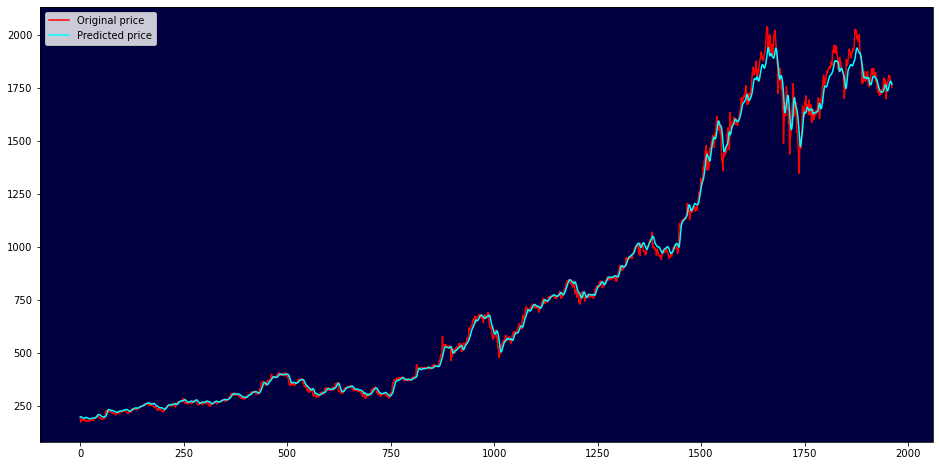

In [67]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
ax.plot(predictions, color='cyan', label='Predicted price')
plt.legend()